In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
salaries = pd.read_csv('./Datasets/ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


In [4]:
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

Working with categorical data

In [50]:
salaries.select_dtypes(include='object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [54]:
print(salaries['Designation'].nunique())    
salaries['Designation'].value_counts()

50


Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

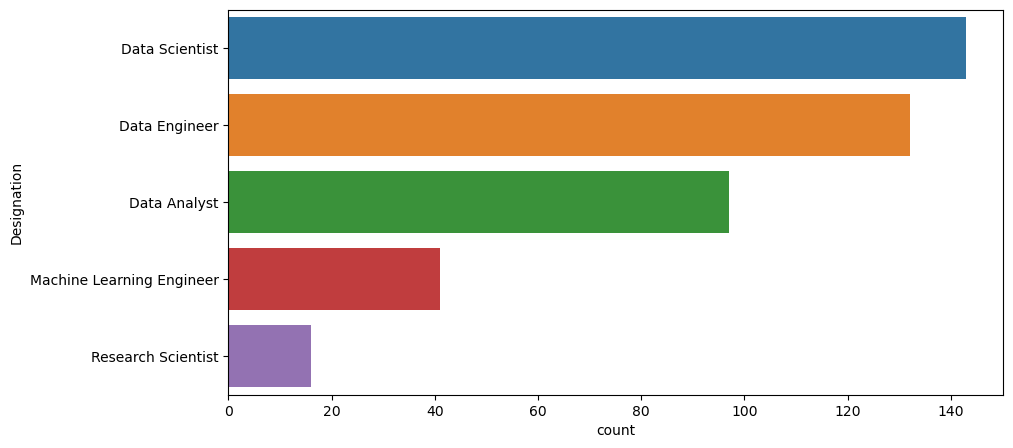

In [55]:
# plot the top 5 most common Designations
plt.figure(figsize=(10,5))
sns.countplot(y='Designation', data=salaries, order=salaries['Designation'].value_counts().iloc[:5].index)
plt.show()


In [59]:
# finding the Designations that contain the word 'Machine Learning' or 'AI'
salaries[salaries['Designation'].str.contains('Machine Learning|AI')]

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
20,2020,Machine Learning Engineer,Mid,FT,CN,M,0,41374.0
29,2020,Machine Learning Manager,Senior,FT,CA,L,50,111815.0
37,2020,Machine Learning Engineer,Entry,FT,US,L,50,238708.0
...,...,...,...,...,...,...,...,...
506,2022,Applied Machine Learning Scientist,Mid,FT,BO,L,100,71613.0
513,2022,Machine Learning Engineer,Senior,FT,IE,S,100,68217.0
532,2022,Machine Learning Engineer,Senior,FT,US,M,100,204334.0
533,2022,Machine Learning Engineer,Senior,FT,US,M,100,183901.0


In [62]:
job_categories = ["Data Science","Data Analytics","Data Engineering",
                  "Machine Learning","Managerial","Consultant"]

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [63]:
conditions = [
    salaries['Designation'].str.contains(data_science),
    salaries['Designation'].str.contains(data_analyst),
    salaries['Designation'].str.contains(data_engineer),
    salaries['Designation'].str.contains(ml_engineer),
    salaries['Designation'].str.contains(manager),
    salaries['Designation'].str.contains(consultant)
]


In [64]:
salaries['Job Category'] = np.select(conditions, job_categories, default='Other')

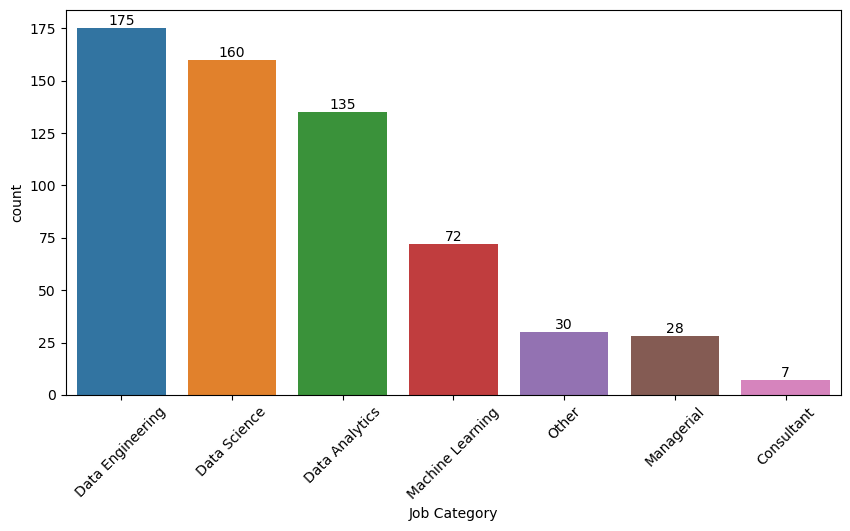

In [72]:
# plot the job categories
plt.figure(figsize=(10,5))
sns.countplot(data=salaries, x='Job Category', order=salaries['Job Category'].value_counts().index) 

# add the count of each category on top of the bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.0f}'.format(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Exploring another dataset with missing values and dealing with them using subgroups imputation

In [5]:
divorce = pd.read_csv('./Datasets/divorce.csv')
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [6]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2209 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [7]:
# select the columns with missing values
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64

In [8]:
divorce[divorce.isna().any(axis=1)]

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN
5,2012-01-02,1973-09-07,Professional,20000.0,1974-05-20,Professional,15.0,2000-03-08,11.0,NaN
11,2010-01-03,1987-05-04,Preparatory,2000.0,1986-09-21,Preparatory,2000.0,2005-07-12,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2204,2006-10-31,1969-11-27,Professional,6000.0,1975-09-01,Professional,14000.0,2002-03-08,4.0,NaN
2205,2006-10-31,1970-09-17,Professional,6000.0,1977-07-22,Professional,6000.0,2002-03-22,4.0,NaN
2206,2011-10-31,1976-03-11,Professional,8000.0,1978-12-28,Professional,7000.0,2009-02-10,2.0,NaN
2207,2012-10-31,1977-10-29,Professional,12500.0,1978-12-01,Professional,6000.0,2008-10-25,3.0,NaN


In [9]:
divorce.describe()

,income_man,income_woman,marriage_duration,num_kids
count,2209.000000,2209.000000,2209.000000,1333.000000
mean,7922.986410,6793.164545,9.606609,1.672918
std,7693.796497,6562.928689,7.266696,0.732858
min,3.000000,3.500000,1.000000,1.000000
25%,3600.000000,3000.000000,4.000000,1.000000
50%,6000.000000,5000.000000,8.000000,2.000000
75%,10000.000000,8000.000000,14.000000,2.000000
max,80000.000000,90000.000000,32.000000,5.000000


In [10]:
divorce['income_man'].agg(['mean', 'median', 'std']).round(2)

mean      7922.99
median    6000.00
std       7693.80
Name: income_man, dtype: float64

In [11]:
divorce.groupby('education_man').agg(
    mean_income = ('income_man', 'mean'),
    std_income = ('income_man', 'std'),
)

,mean_income,std_income
education_man,,
None,3325.000000,1369.610650
Other,11000.000000,6557.438524
Preparatory,6020.283433,7061.140022
Primary,3556.000000,2766.441028
Professional,9713.683534,8031.544834
Secondary,4617.182292,5630.745205


In [13]:
divorce.groupby('education_woman').agg(
    mean_income = ('income_woman', 'mean'),
    std_income = ('income_woman', 'std'),
)

,mean_income,std_income
education_woman,,
Other,17000.000000,18384.776311
Preparatory,4951.118421,6360.177788
Primary,5072.923077,13454.656457
Professional,8036.385890,6273.515322
Secondary,3432.843874,2352.659667


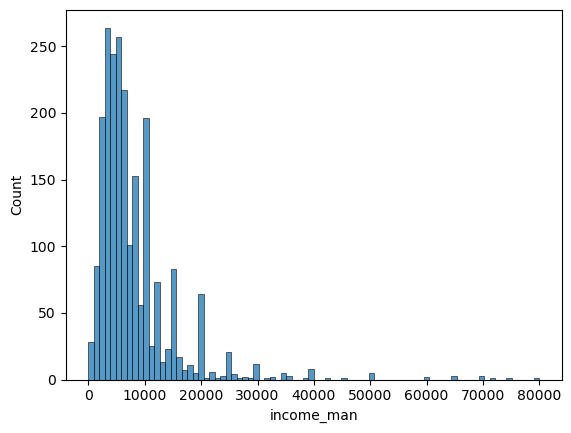

In [14]:
sns.histplot(data=divorce, x='income_man')
plt.show()

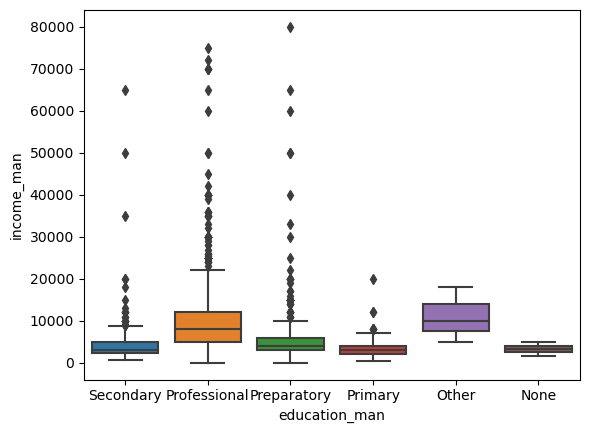

In [16]:
sns.boxplot(data=divorce, x='education_man', y='income_man')
plt.show()

In [17]:
divorce['num_kids'].agg(['mean', 'median', 'std']).round(2)

mean      1.67
median    2.00
std       0.73
Name: num_kids, dtype: float64

In [21]:
# # this should do the trick if the dataset had more missing values.
# # Find the five percent threshold
# threshold = len(divorce) * 0.05
# threshold

# # Create a filter
# cols_to_drop = divorce.columns[divorce.isna().sum() <= threshold]
# cols_to_drop
# # Drop missing values for columns below the threshold
# #planes.dropna(subset=cols_to_drop, inplace=True)

In [22]:
divorce['marriage_duration'].agg(['mean', 'median', 'std']).round(2)

mean      9.61
median    8.00
std       7.27
Name: marriage_duration, dtype: float64

In [35]:
divorce.groupby('num_kids').agg(
    mean_marriage_duration = ('marriage_duration', 'mean'),
    median_marriage_duration = ('marriage_duration', 'median'),
    std_marriage_duration = ('marriage_duration', 'std'),
)

,mean_marriage_duration,median_marriage_duration,std_marriage_duration
num_kids,,,
1.0,8.933977,7.0,6.011856
2.0,14.421818,13.0,6.918750
3.0,17.978873,17.0,6.467012
4.0,17.058824,17.0,6.731183
5.0,25.000000,25.0,6.000000


<AxesSubplot:xlabel='num_kids', ylabel='marriage_duration'>

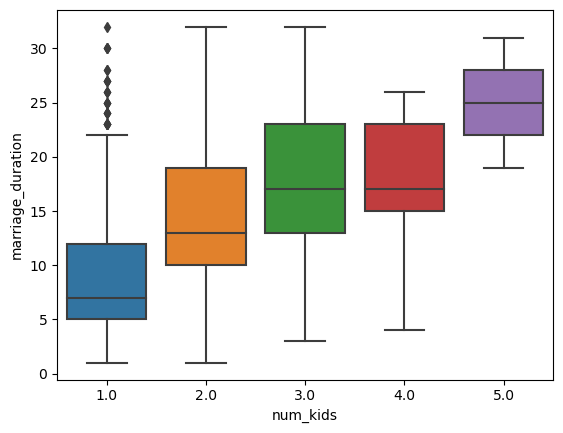

In [28]:
sns.boxplot(data=divorce, x='num_kids', y='marriage_duration')

In [31]:
# dealing with missing values
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64

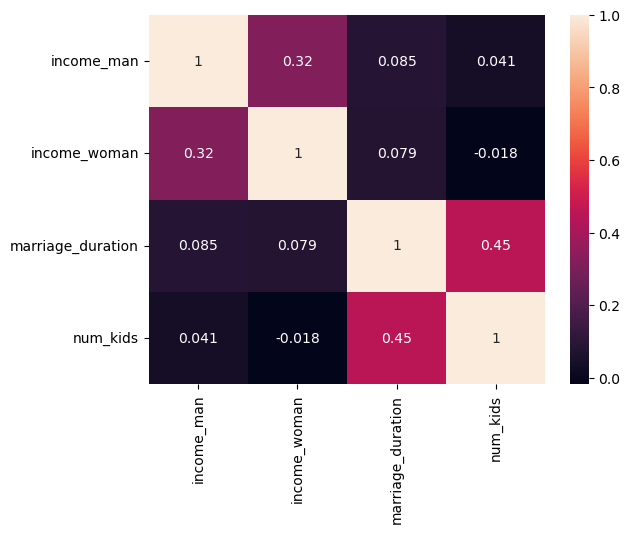

In [34]:
# plot a correlation matrix using seaborn
sns.heatmap(divorce.corr(), annot=True)
plt.show()


In [38]:
divorce.describe()

,income_man,income_woman,marriage_duration,num_kids
count,2209.000000,2209.000000,2209.000000,1333.000000
mean,7922.986410,6793.164545,9.606609,1.672918
std,7693.796497,6562.928689,7.266696,0.732858
min,3.000000,3.500000,1.000000,1.000000
25%,3600.000000,3000.000000,4.000000,1.000000
50%,6000.000000,5000.000000,8.000000,2.000000
75%,10000.000000,8000.000000,14.000000,2.000000
max,80000.000000,90000.000000,32.000000,5.000000


In [46]:
# impute missing values with the median of subgroups in marriage_duration
divorce_dict = divorce.groupby('marriage_duration')['num_kids'].median().to_dict()

In [47]:
divorce['num_kids'] = divorce['num_kids'].fillna(divorce['marriage_duration'].map(divorce_dict))

In [48]:
divorce.isna().sum()

divorce_date         0
dob_man              0
education_man        0
income_man           0
dob_woman            0
education_woman      0
income_woman         0
marriage_date        0
marriage_duration    0
num_kids             0
dtype: int64